<a href="https://colab.research.google.com/github/leonardoacosta91/PlatziDataTriathlon/blob/main/NotebookDataTriathlonPlatzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consideraciones  generales
Para una correcta participación en la competencia **Data Thriatlon** sigue este formato de notebook propuestó por el equipo de data de Platzi. Esto ayudará en la calificación de tu notebook.

Secciones del notebook:

* Extracción de datos adicionales (0-20%)
* Limpieza y transformación de datos. (0-20%)
* Analisís exploratorio (*analytics, data visualization y storytelling*). (0-60%)
* Modelo (opcional).

*Para revisar las reglas de la competencia ve a este [blogpost](https://platzi.com/blog/olimpiadas-data-triathlon/).

# ¿Qué hay en los datos?

En los datos encontrarás información de las **exportaciones e importaciones de Colombia de 1962 a 2017**. Fueron extraídos del [OEC: The Observatory of Economic Complexity](https://legacy.oec.world/en/).

Tu labor será desarrollar un análisis exploratorio para encontrar insights valiosos a partir de esos datos y otros que recopiles.



## Preguntas

Para el desarrollo de tu análisis puedes resolver las siguientes preguntas:

1. ¿Cuál es el top 10 países a los que Colombia exporta sus productos y su evolución con respecto al tiempo?
2. ¿Cuál es el top 10 países de los que Colombia importa sus productos y su evolución con respecto al tiempo?
3. ¿Existe algún producto que debido a cambios económicos en la oferta/demanda halla causado un decremento en el volumen de dinero que se mueve con él?
4. ¿Cuáles sectores económicos tienen mayor importancia en las exportaciones de Colombia y por qué?

**También puedes resolver preguntas que a ti se te ocurran.**

# Extracción de datos adicionales (0-20%)

Para extraer información adicional a la proporcionada por Platzi puedes extraerla directamente de la fuente de datos original. El dataset cuenta con la información extraída del *OEC: The Observatory of Economic Complexity*, específicamente de la versión legacy la cual permite la descarga de archivos a partir de una URL y de la API expuesta por ellos.

- [https://legacy.oec.world/en/resources/data/](https://legacy.oec.world/en/resources/data/)
- [https://legacy.oec.world/api/](https://legacy.oec.world/api/)

**Para tu análisis recolecta más datos de esta y otras fuentes que veas necesarias.**

In [ ]:
!pip install geopandas
!pip install geoplot

In [ ]:
import geoplot
import geopandas
import mapclassify
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


# Limpieza y transformación de datos (0-20%)

Para la limpieza de datos puedes utilizar herramientas como Pandas y numpy con el fin de limpiar y estructurar todo tipo de datos nulos o vacíos que no sean necesarios para el análisis de los datos requeridos.

### Imports and mount drive
First of all, we need you import the necessary libraries that we are going to use in the project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format

### Read csv files
After that, use pandas libraries to read the csv files and prepare to analyse.

In [ ]:
country_names = pd.read_csv('https://raw.githubusercontent.com/sergi0gs/Data_triathlon_Platzi/master/country_names.csv', delimiter = '|')
colombia_exports = pd.read_csv('https://raw.githubusercontent.com/sergi0gs/Data_triathlon_Platzi/master/colombia_exports.csv', delimiter = '|')
colombia_imports = pd.read_csv('https://raw.githubusercontent.com/sergi0gs/Data_triathlon_Platzi/master/colombia_imports.csv', delimiter = '|' )
groups_sitc_rev2 = pd.read_csv('https://raw.githubusercontent.com/sergi0gs/Data_triathlon_Platzi/master/groups_sitc_rev2.csv', delimiter = '|')
products_sitc_rev2 = pd.read_csv('https://raw.githubusercontent.com/sergi0gs/Data_triathlon_Platzi/master/products_sitc_rev2.csv', delimiter = '|')

### Shape of our data
Then, use "shape" to know about the dataset dimensions.

In [ ]:
print(f'colombia_exports: {colombia_exports.shape},\ncolombia_imports: {colombia_imports.shape},\ncountry_names: {country_names.shape}')
print(f'groups_sitc_rev2: {groups_sitc_rev2.shape},\nproducts_sitc_rev2: {products_sitc_rev2.shape}')

colombia_exports: (799406, 7),
colombia_imports: (775902, 7),
country_names: (263, 4)
groups_sitc_rev2: (65, 3),
products_sitc_rev2: (988, 4)


## Now, we are in one of the most important parts, "Cleaning". Use pandas libraries to clean your datasets and prepare it to process.

### cleaning of export dataframe

Para comenzar con el análisis de los datos, necesitamos tener un data frame limpio, de donde extraer los datos.

In [ ]:
colombia_exports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799406 entries, 0 to 799405
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  799406 non-null  int64  
 1   year        799406 non-null  int64  
 2   origin      799406 non-null  object 
 3   dest        799406 non-null  object 
 4   sitc4       799406 non-null  int64  
 5   export_val  715852 non-null  float64
 6   import_val  756158 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 42.7+ MB


Cambiamos "Unnamed" por "id"

In [ ]:
colombia_exports.rename(columns={'Unnamed: 0':'id'}, inplace = True)
colombia_exports.head()

,id,year,origin,dest,sitc4,export_val,import_val
0,761444,1962,col,civ,712,0.00,"13,000.00"
1,761445,1962,col,civ,1210,"12,000.00",0.00
2,761446,1962,col,cod,2925,0.00,"2,000.00"
3,761447,1962,col,cog,2925,0.00,"2,000.00"
4,761448,1962,col,dza,1210,"112,000.00",0.00


In [ ]:
# Chance the "year" (int64) format to a (datetime64) format
colombia_exports.year = pd.to_datetime(colombia_exports.year, format='%Y')
colombia_exports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799406 entries, 0 to 799405
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          799406 non-null  int64         
 1   year        799406 non-null  datetime64[ns]
 2   origin      799406 non-null  object        
 3   dest        799406 non-null  object        
 4   sitc4       799406 non-null  int64         
 5   export_val  715852 non-null  float64       
 6   import_val  756158 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 42.7+ MB


In [ ]:
# Cleaning: We eliminate rows that have NaN value.
colombia_exports_clean = colombia_exports.dropna()

In [ ]:
# We remove those that have a value  0 in exports column
colombia_exports_clean = colombia_exports_clean[colombia_exports_clean['export_val'] != 0]
colombia_exports_clean.head()

,id,year,origin,dest,sitc4,export_val,import_val
1,761445,1962-01-01,col,civ,1210,"12,000.00",0.00
4,761448,1962-01-01,col,dza,1210,"112,000.00",0.00
5,761449,1962-01-01,col,egy,2472,"6,000.00",0.00
11,761455,1962-01-01,col,mar,1210,"164,000.00",0.00
12,761456,1962-01-01,col,mar,711,"5,000.00",0.00


In [ ]:
# We add the values of imports and exports to obtain a column with the actual value of exports 
colombia_exports_clean['export_val'] = colombia_exports_clean['export_val'] + colombia_exports_clean['import_val']

### Cleaning of imports dataframe

In [ ]:
colombia_imports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775902 entries, 0 to 775901
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  775902 non-null  int64  
 1   year        775902 non-null  int64  
 2   origin      775902 non-null  object 
 3   dest        775902 non-null  object 
 4   sitc4       775902 non-null  int64  
 5   export_val  731962 non-null  float64
 6   import_val  719568 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 41.4+ MB


In [ ]:
colombia_imports.rename(columns={'Unnamed: 0':'id'}, inplace = True)
colombia_exports.head()

,id,year,origin,dest,sitc4,export_val,import_val
0,761444,1962-01-01,col,civ,712,0.00,"13,000.00"
1,761445,1962-01-01,col,civ,1210,"12,000.00",0.00
2,761446,1962-01-01,col,cod,2925,0.00,"2,000.00"
3,761447,1962-01-01,col,cog,2925,0.00,"2,000.00"
4,761448,1962-01-01,col,dza,1210,"112,000.00",0.00


In [ ]:
# Chance the "year" (int64) format to a (datetime64) format
colombia_imports.year = pd.to_datetime(colombia_imports.year, format='%Y')
colombia_imports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775902 entries, 0 to 775901
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          775902 non-null  int64         
 1   year        775902 non-null  datetime64[ns]
 2   origin      775902 non-null  object        
 3   dest        775902 non-null  object        
 4   sitc4       775902 non-null  int64         
 5   export_val  731962 non-null  float64       
 6   import_val  719568 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 41.4+ MB


In [ ]:
# We rename the columns, delete the null and zero values, to finally add the export and import columns to obtain the actual values  
colombia_imports_clean = colombia_imports.rename(columns={'export_val':'import_val','import_val':'export_val'})
colombia_imports_clean = colombia_imports_clean[colombia_imports_clean['import_val'] != 0]
colombia_imports_clean.head()

,id,year,origin,dest,sitc4,import_val,export_val
0,11564,1962-01-01,civ,col,712,"13,000.00",0.00
2,17741,1962-01-01,cod,col,2925,"2,000.00",0.00
3,20216,1962-01-01,cog,col,2925,"2,000.00",0.00
6,29089,1962-01-01,egy,col,2631,"40,000.00",0.00
7,32443,1962-01-01,eth,col,2922,"4,000.00",0.00


In [ ]:
# Limpieza: Eliminamos filas que tengan valor NaN
colombia_imports_clean = colombia_imports.dropna()

In [ ]:
colombia_imports_clean['import_val'] = colombia_imports_clean['import_val'] + colombia_imports_clean['export_val']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Cleaning of country_names

In [ ]:
# Change the name of the colums and drop the Unnamed column 
country_names = country_names.drop(columns="Unnamed: 0")
country_names = country_names.rename(columns={'id':'id_country'})
country_names.head()

,id_country,id_3char,name
0,afago,ago,Angola
1,afbdi,bdi,Burundi
2,afben,ben,Benin
3,afbfa,bfa,Burkina Faso
4,afbwa,bwa,Botswana


### Cleaning of products_sitc 

In [ ]:
# Remove unnecessary columns and rename other columns 
products_sitc_rev2 = products_sitc_rev2.rename(columns={'Unnamed: 0': 'id_category'})
products_sitc_rev2 = products_sitc_rev2.rename(columns={'id': 'id_products'})
products_sitc_rev2 = products_sitc_rev2.rename(columns={'name': 'products_name'})
products_sitc_rev2.head()

,id_category,id_products,sitc,products_name
0,0,105722,5722,Initiating Devices
1,1,105838,5838,Polymerization Ion Exchangers
2,2,106250,6250,"Rubber tires, tire cases, inner and flaps, for..."
3,3,106251,6251,Car Tires
4,4,106280,6280,Other articles of rubber


### Add country names to exportations

In [ ]:
#  We make a join of the data "Exports" and "Country_names" for DESTINATION
merged_inner_export_country = pd.merge(left=colombia_exports_clean,right=country_names, left_on='dest', right_on='id_3char')
merged_inner_export_country = merged_inner_export_country.loc[:,['id','year','sitc4','origin','dest','name','export_val']]
merged_inner_export_country = merged_inner_export_country.rename(columns = {'name':'destiny_name'})
merged_inner_export_country.head()

,id,year,sitc4,origin,dest,destiny_name,export_val
0,761445,1962-01-01,1210,col,civ,Cote d'Ivoire,"12,000.00"
1,5856336,1967-01-01,711,col,civ,Cote d'Ivoire,"2,000.00"
2,6964403,1968-01-01,711,col,civ,Cote d'Ivoire,"3,000.00"
3,8113337,1969-01-01,711,col,civ,Cote d'Ivoire,"1,000.00"
4,9322290,1970-01-01,711,col,civ,Cote d'Ivoire,"3,000.00"


In [ ]:
# We make a join of the data "Exports" and "Country_names" for ORIGIN
merged_inner_export_country = pd.merge(left = merged_inner_export_country, right = country_names, left_on='origin', right_on='id_3char')
merged_inner_export_country = merged_inner_export_country.loc[:,['id','year','sitc4','origin', 'name','dest','destiny_name','export_val']]
merged_inner_export_country.rename(columns = {'name':'origin_name'},inplace = True)
merged_inner_export_country.head()

,id,year,sitc4,origin,origin_name,dest,destiny_name,export_val
0,761445,1962-01-01,1210,col,Colombia,civ,Cote d'Ivoire,"12,000.00"
1,5856336,1967-01-01,711,col,Colombia,civ,Cote d'Ivoire,"2,000.00"
2,6964403,1968-01-01,711,col,Colombia,civ,Cote d'Ivoire,"3,000.00"
3,8113337,1969-01-01,711,col,Colombia,civ,Cote d'Ivoire,"1,000.00"
4,9322290,1970-01-01,711,col,Colombia,civ,Cote d'Ivoire,"3,000.00"


### add country names to importations

In [ ]:
#  We make a join of the data "Imports" and "Country_names" for DESTINATION.
merged_inner_import_country = pd.merge(left=colombia_imports_clean,right=country_names, left_on='dest', right_on='id_3char')
merged_inner_import_country = merged_inner_import_country.loc[:,['id','year','sitc4','origin','dest','name','import_val']]
merged_inner_import_country = merged_inner_import_country.rename(columns = {'name':'destiny_name'})
merged_inner_import_country.head()

,id,year,sitc4,origin,dest,destiny_name,import_val
0,11564,1962-01-01,712,civ,col,Colombia,"13,000.00"
1,11565,1962-01-01,1210,civ,col,Colombia,"12,000.00"
2,17741,1962-01-01,2925,cod,col,Colombia,"2,000.00"
3,20216,1962-01-01,2925,cog,col,Colombia,"2,000.00"
4,25005,1962-01-01,1210,dza,col,Colombia,"112,000.00"


In [ ]:
# We make a join of the data "Imports" and "Country_names" for ORIGIN
merged_inner_import_country = pd.merge(left = merged_inner_import_country, right = country_names, left_on='origin', right_on='id_3char')
merged_inner_import_country = merged_inner_import_country.loc[:,['id','year','sitc4','origin', 'name','dest','destiny_name','import_val']]
merged_inner_import_country = merged_inner_import_country.rename(columns = {'name':'origin_name'})
merged_inner_import_country.head()

,id,year,sitc4,origin,origin_name,dest,destiny_name,import_val
0,11564,1962-01-01,712,civ,Cote d'Ivoire,col,Colombia,"13,000.00"
1,11565,1962-01-01,1210,civ,Cote d'Ivoire,col,Colombia,"12,000.00"
2,876073,1963-01-01,2925,civ,Cote d'Ivoire,col,Colombia,"16,000.00"
3,1816915,1964-01-01,2925,civ,Cote d'Ivoire,col,Colombia,"26,000.00"
4,2802164,1965-01-01,2232,civ,Cote d'Ivoire,col,Colombia,"1,000.00"


### Add product names to exportations

In [ ]:
# Join the country names data frame to exports data frame
products_export_join = pd.merge(left = merged_inner_export_country, right = products_sitc_rev2, left_on = 'sitc4', right_on = 'sitc')
products_export_join = products_export_join.loc[:,['id','year','sitc4','origin','origin_name','dest','destiny_name','export_val','products_name']]
colombia_export_final = products_export_join[~products_export_join.dest.isin(["wld","xxa"])]
colombia_export_final.head()

,id,year,sitc4,origin,origin_name,dest,destiny_name,export_val,products_name
0,761445,1962-01-01,1210,col,Colombia,civ,Cote d'Ivoire,"12,000.00",Tobacco unmanufactured; tobacco refuse
1,10554078,1971-01-01,1210,col,Colombia,civ,Cote d'Ivoire,"9,000.00",Tobacco unmanufactured; tobacco refuse
2,11828289,1972-01-01,1210,col,Colombia,civ,Cote d'Ivoire,"7,000.00",Tobacco unmanufactured; tobacco refuse
3,13148075,1973-01-01,1210,col,Colombia,civ,Cote d'Ivoire,"22,000.00",Tobacco unmanufactured; tobacco refuse
4,14532120,1974-01-01,1210,col,Colombia,civ,Cote d'Ivoire,"29,000.00",Tobacco unmanufactured; tobacco refuse


### Add product names to importations

In [ ]:
# Join the country names data frame to imports data frame
products_imports_join = pd.merge(left = merged_inner_import_country, right = products_sitc_rev2, left_on = 'sitc4', right_on = 'sitc')
products_imports_join = products_imports_join.loc[:,['id','year','sitc4','origin','origin_name','dest','destiny_name','import_val','products_name']]
colombia_imports_final = products_imports_join[~products_imports_join.origin.isin(["wld","xxa"])]
colombia_imports_final.head()

,id,year,sitc4,origin,origin_name,dest,destiny_name,import_val,products_name
0,11564,1962-01-01,712,civ,Cote d'Ivoire,col,Colombia,"13,000.00",Coffee Extracts
1,81250699,2006-01-01,712,civ,Cote d'Ivoire,col,Colombia,"23,572.00",Coffee Extracts
2,20240185,1979-01-01,712,cog,Republic of the Congo,col,Colombia,"2,000.00",Coffee Extracts
3,43903027,1993-01-01,712,dza,Algeria,col,Colombia,"5,001.00",Coffee Extracts
4,46188361,1994-01-01,712,dza,Algeria,col,Colombia,"8,109.00",Coffee Extracts


# Análisis exploratorio (*analytics, data visualization y storytelling* (0-60%)

El análisis exploratorio es parte fundamental para responder las preguntas propuestas por el equipo de data scientists de Platzi. 

* Mantén un código, visualizaciones y storytelling ordenados. 
* Muestra gráficas inline haciendo uso de herramientas como Matplotlib, Seaborn y otras. 
* En el storytelling la narrativa y la visualización deben tener sentido, procura que las gráficas sean visibles, aporten valor a responder las preguntas y sean lo más descriptivas posibles. 
* Además agrega textos que faciliten la narrativa del storytelling.

### Graphics functions

In [ ]:
# We made two time-saving plotting functions
def barPlot(dataframe,title,xColumn,xLabel,yColumn,yLabel):
  plt.figure(figsize=(14,6))
  ax = sns.barplot(x=xColumn,y=yColumn,data=dataframe,palette="Blues_d")
  ax.axes.set_title(title,fontsize=20)
  ax.set_xlabel(xLabel,fontsize=15)
  ax.set_ylabel(yLabel,fontsize=15)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
  for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

def linePlot(dataframe,title,xColumn,xLabel,yColumn,yLabel,optional_hue="none"):
  plt.figure(figsize=(14,6))
  if optional_hue is not "none":
    ax = sns.lineplot(data=dataframe,x=xColumn,y=yColumn,hue=optional_hue)
  else:
    ax = sns.lineplot(data=dataframe,x=xColumn,y=yColumn)
  ax.axes.set_title(title,fontsize=20)
  ax.set_xlabel(xLabel,fontsize=15)
  ax.set_ylabel(yLabel,fontsize=15)

## **What is the top 10 countries that Colombia exports its products and how is its evolucion on the time?**

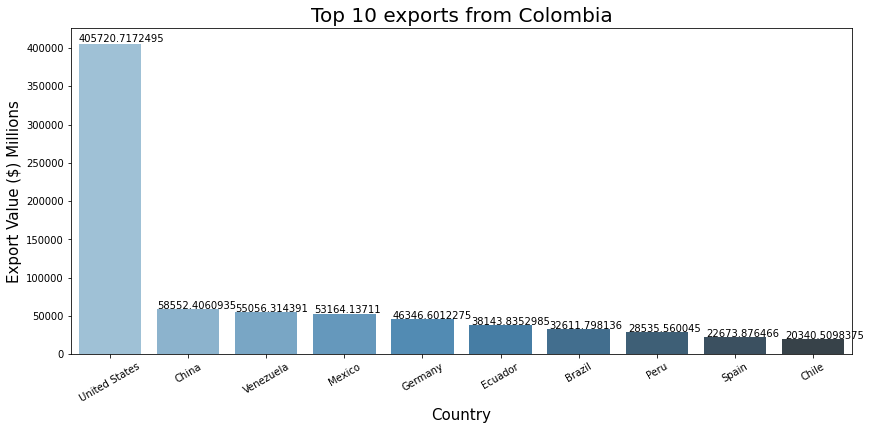

In [ ]:
colombia_top_10_export = colombia_export_final.groupby(["destiny_name"])["export_val"].sum().sort_values(ascending=False).reset_index()[:10]
colombia_top_10_export['export_val'] = colombia_top_10_export.export_val.apply(lambda x:x/1000000)

barPlot(colombia_top_10_export,"Top 10 exports from Colombia","destiny_name","Country","export_val","Export Value ($) Millions")

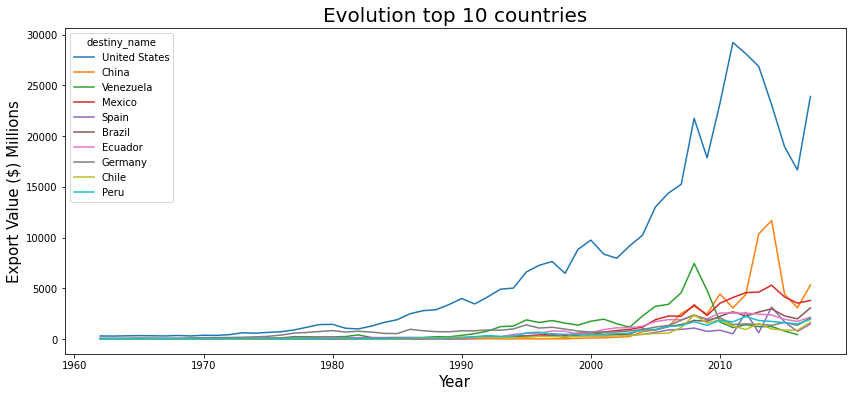

In [ ]:
colombia_top_10_exports_year = colombia_export_final[colombia_export_final.destiny_name.isin(colombia_top_10_export.destiny_name)].groupby(["year","destiny_name"])["export_val"].sum().sort_values(ascending=False).reset_index()
colombia_top_10_exports_year['export_val'] = colombia_top_10_exports_year.export_val.apply(lambda x:x/1000000)

linePlot(colombia_top_10_exports_year,"Evolution top 10 countries","year","Year","export_val","Export Value ($) Millions","destiny_name")

As we can see in the charts, the United States is Colombia's largest trading partner by far. This good relationship has been in place since the mid-19th and early 20th centuries, and goes beyond that. The United States and Colombia have worked together on a number of projects, including the war on drugs. 

Both nations share thoughts on democracy and human rights.
 *The United States values the friendship with Colombia; a relationship that is grounded in a set of shared values, and a commitment to democracy, the rule of law and fundamental human rights. **Office of the Spokesperson, U.S. Embassy in Colombia **.


## **What is the top 10 countries that Colombia import its products and how is its evolution over the time?**

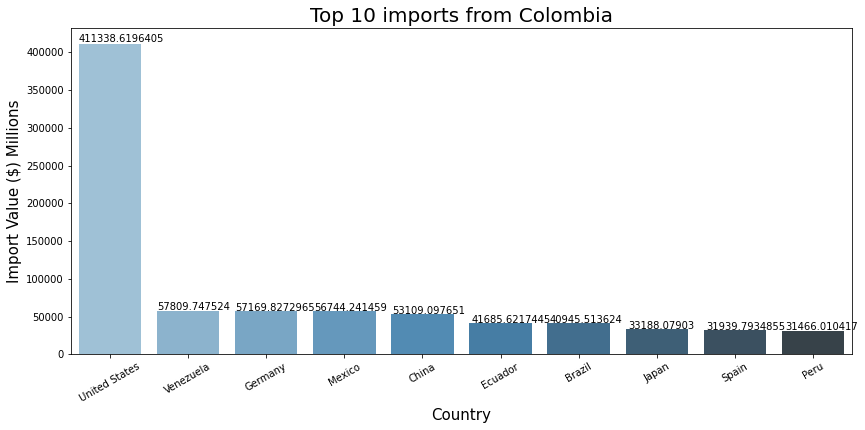

In [ ]:
colombia_top_10_imports = colombia_imports_final.groupby(["origin_name"])["import_val"].sum().sort_values(ascending=False).reset_index()[:10]
colombia_top_10_imports['import_val'] = colombia_top_10_imports.import_val.apply(lambda x:x/1000000)

barPlot(colombia_top_10_imports,"Top 10 imports from Colombia","origin_name","Country","import_val","Import Value ($) Millions")

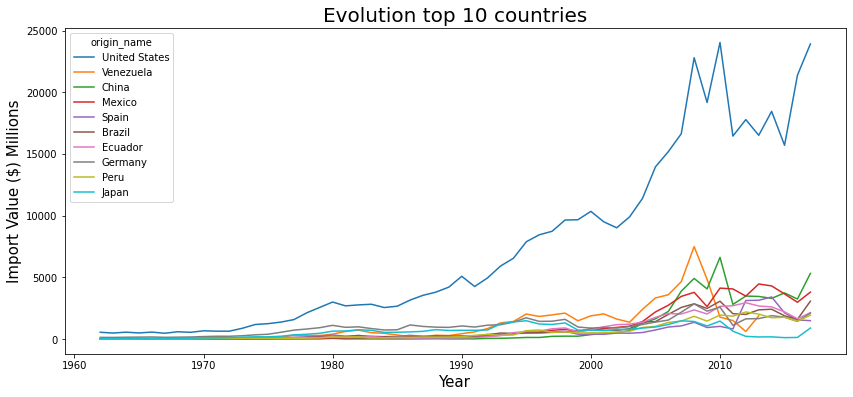

In [ ]:
colombia_top_10_imports_year = colombia_imports_final[colombia_imports_final.origin_name.isin(colombia_top_10_imports.origin_name)].groupby(["year","origin_name"])["import_val"].sum().sort_values(ascending=False).reset_index()
colombia_top_10_imports_year['import_val'] = colombia_top_10_imports_year.import_val.apply(lambda x:x/1000000)

linePlot(colombia_top_10_imports_year,"Evolution top 10 countries","year","Year","import_val","Import Value ($) Millions","origin_name")

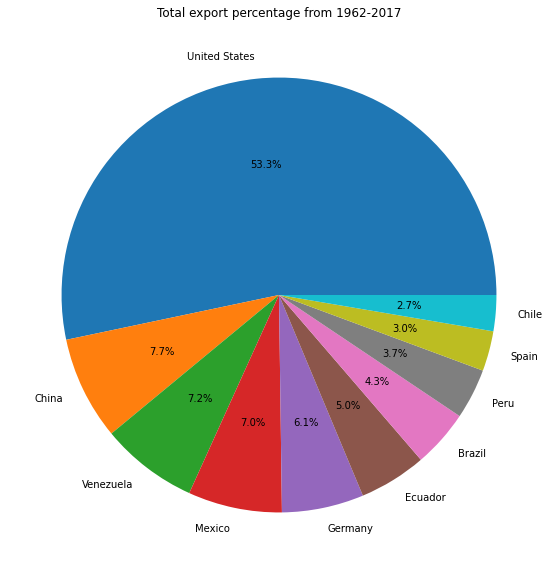

In [ ]:
plt.figure(figsize=(20,10))
plt.pie(colombia_top_10_export['export_val'],labels=colombia_top_10_export['destiny_name'],autopct='%1.1f%%')
plt.title('Total export percentage from 1962-2017')
plt.show()

Although to a lesser extent, the United States is also the largest importer of Colombian products. For the U.S., Colombia represents the third largest economic ally in Latin America. Demonstrating once again the good economic relationship between these two nations.

Since 1970 the United States has played an important role in Colombia's external economy, with coffee being the main export product at that time.

## **What was the economics sectors that are more important in Colombia exports and why?**

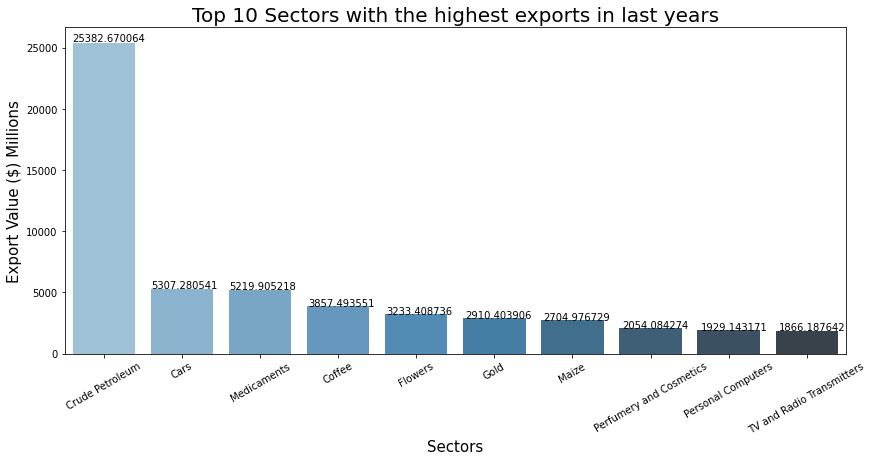

In [ ]:
last_period = ["2014-01-01","2015-01-01","2016-01-01"]
colombia_top_10_sectors = colombia_export_final[colombia_export_final.year.isin(last_period)].groupby(["products_name"])["export_val"].sum().sort_values(ascending=False).reset_index()[:10]
colombia_top_10_sectors['export_val'] = colombia_top_10_sectors.export_val.apply(lambda x:x/1000000)

barPlot(colombia_top_10_sectors,"Top 10 Sectors with the highest exports in last years","products_name","Sectors","export_val","Export Value ($) Millions")

As is evident, the Petroleum sector is by far the product that brings in the most money to the country. Since 1999, Colombia has promoted the search for new Petroleum deposits for their exploitation.
Colombia's Petroleum reserve for 2019 is at 2,036 million barrels and during 2019 Petroleum production reached 323 million barrels.
The second most important sector is the automotive industry, which mainly comprises the assembly of vehicles and motorcycles.
The Colombian automotive industry generates close to 24,783 direct jobs, ranking fourth in vehicle production in Latin America, 

## **Imports and Exports relations**

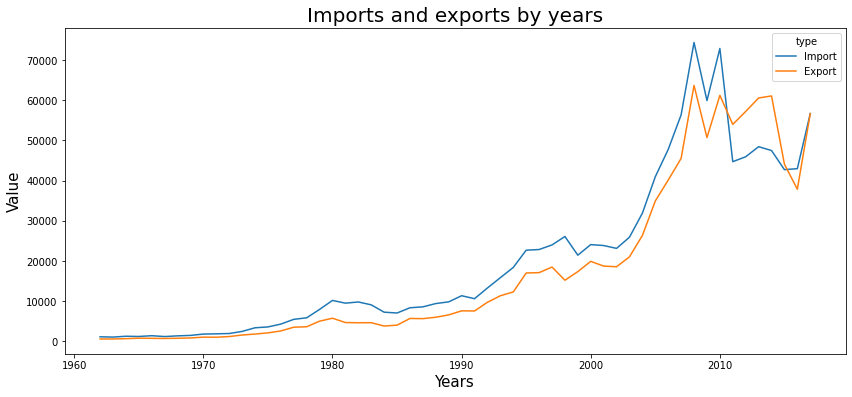

In [ ]:
colombia_imports_year = colombia_imports_final.groupby("year")["import_val"].sum().sort_values(ascending=False).reset_index()
colombia_imports_year["type"] = "Import"
colombia_imports_year.rename(columns = {'import_val':'val'},inplace=True)

colombia_exports_year = colombia_export_final.groupby("year")["export_val"].sum().sort_values(ascending=False).reset_index()
colombia_exports_year["type"] = "Export"
colombia_exports_year.rename(columns = {'export_val':'val'},inplace=True)

colombia_imports_and_exports = pd.concat([colombia_imports_year,colombia_exports_year])


colombia_imports_and_exports["val"] = colombia_imports_and_exports.val.apply(lambda x:x/1000000)

linePlot(colombia_imports_and_exports,"Imports and exports by years","year","Years","val","Value","type")

During the 90's, Colombia began a process of trade opening to replace its highly protectionist policy (the strongest among the Andean countries), towards a more open economy, with gradual reduction of tariff and non-tariff barriers, which has led it to negotiate agreements with countries on various continents attracted at the time, both by the economic boom that the country was experiencing, and by its strategic geographical position.

Due to this, it can be clearly seen how Colombian exports increase exponentially after this period.

# **In what year was the highest exportation value of the Crude Petroleum sector in Colombia since 2000?**


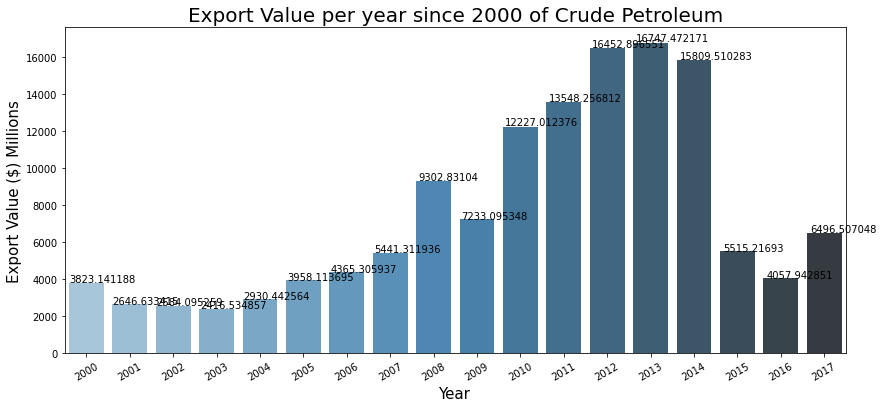

In [ ]:
colombia_crude_petroleum = colombia_export_final[colombia_export_final.products_name == "Crude Petroleum"].groupby(["year"])["export_val"].sum().reset_index()[35:]
colombia_crude_petroleum['year'] = colombia_crude_petroleum['year'].dt.year
colombia_crude_petroleum
colombia_crude_petroleum['export_val'] = colombia_crude_petroleum.export_val.apply(lambda x:x/1000000)
barPlot(colombia_crude_petroleum,"Export Value per year since 2000 of Crude Petroleum","year","Year","export_val","Export Value ($) Millions")

**Conclusion** The highest exportation value of Crude Petroleum was in 2013. However, if we look the Macrotrends (https://www.macrotrends.net/1369/crude-oil-price-history-chart) we will realize that the petroleum price had almost the 50% of reduction since 2014 and in 2015, 30%. This severly affected the petroleum earnings as we can visualize on the plot

## **Exportation total map**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Export over the world')

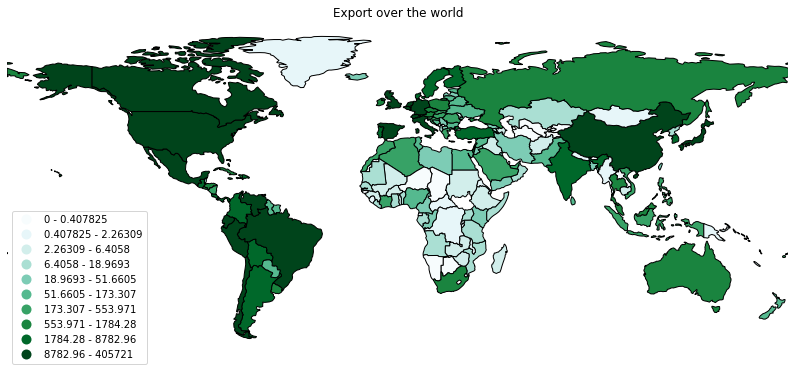

In [ ]:
colombia_export_final["dest"] = colombia_export_final.dest.apply(lambda x:x.upper())
colombia_export_grouped = colombia_export_final.groupby(["dest","destiny_name"])["export_val"].sum().reset_index()
colombia_exports_with_geometry = pd.merge(colombia_export_grouped,world[["iso_a3","geometry"]],how='inner',left_on="dest",right_on="iso_a3")
colombia_exports_with_geometry.drop("iso_a3",axis=1,inplace=True)
colombia_exports_geo = geopandas.GeoDataFrame(colombia_exports_with_geometry)
colombia_exports_geo["export_val"] = colombia_exports_geo.export_val.apply(lambda x:x/1000000)

scheme = mapclassify.Quantiles(colombia_exports_geo.export_val, k=10)
geoplot.choropleth(colombia_exports_geo, hue=colombia_exports_geo["export_val"],scheme=scheme,
    cmap='BuGn', figsize=(14, 8),legend=True)
plt.title("Export over the world")

**Conclusion:** North America is the continent from which Colombia exports the most. Continues some countries of South America and some of Asia and Europe

## Importation total map

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Imports over the world')

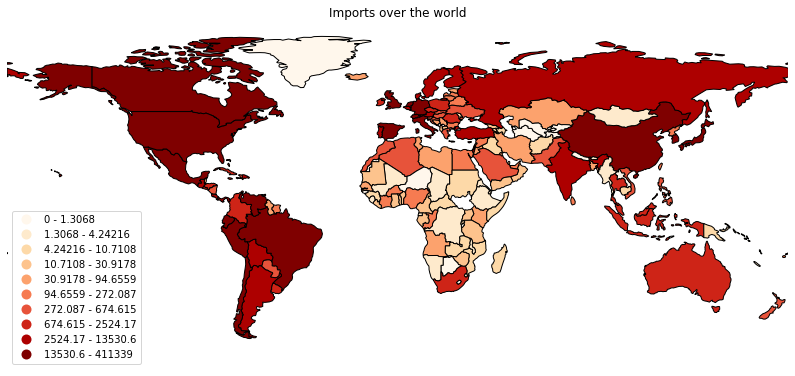

In [ ]:
colombia_imports_final["origin"] = colombia_imports_final.origin.apply(lambda x:x.upper())
colombia_import_grouped = colombia_imports_final.groupby(["origin","origin_name"])["import_val"].sum().reset_index()
colombia_imports_with_geometry = pd.merge(colombia_import_grouped,world[["iso_a3","geometry"]],how='inner',left_on="origin",right_on="iso_a3")
colombia_imports_with_geometry.drop("iso_a3",axis=1,inplace=True)
colombia_imports_geo = geopandas.GeoDataFrame(colombia_imports_with_geometry)
colombia_imports_geo["import_val"] = colombia_imports_geo.import_val.apply(lambda x:x/1000000)

scheme = mapclassify.Quantiles(colombia_imports_geo.import_val, k=10)
geoplot.choropleth(colombia_imports_geo, hue=colombia_imports_geo["import_val"],scheme=scheme,
    cmap='OrRd', figsize=(14, 8),legend=True)
plt.title("Imports over the world")

**Conclusions**

As we can see in the graphs of imports and exports worldwide of Colombia, its trade is mainly in America,Europe and Asia. With countries such as: United States, Panama, China, Netherlands, Mexico ,Spain, Brazil and Germany. The U.S. being the largest trading partner. 
Thanks to this diversity of trade in 2019 Colombia was the 38th economy in terms of GDP.

## Products with most aggresive changes over the years

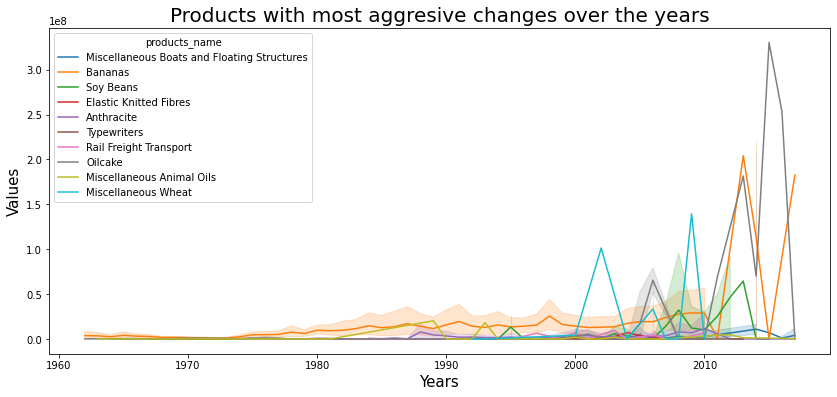

In [ ]:
sitc4 = iter(colombia_export_final["sitc4"].unique())
colombia_export_complete = colombia_export_final[colombia_export_final.sitc4 == next(sitc4)].groupby(["year","sitc4"])["export_val"].sum().reset_index().sort_values(by="year").copy()
colombia_export_complete["previous"] = colombia_export_complete["export_val"].shift(1)

for i in sitc4:
  aux = colombia_export_final[colombia_export_final.sitc4 == i].groupby(["year","sitc4"])["export_val"].sum().reset_index().sort_values(by="year")
  aux["previous"] = aux["export_val"].shift(1)
  colombia_export_complete = colombia_export_complete.append(aux)

colombia_export_complete["percentage_change"] = abs((colombia_export_complete["export_val"] - colombia_export_complete["previous"])/colombia_export_complete["export_val"] * 100)

grouped_percentage_top = colombia_export_complete.groupby("sitc4")["percentage_change"].sum().sort_values(ascending=False).reset_index()[:10]
sitc4_top_percentage=grouped_percentage_top.sitc4.values

linePlot(colombia_export_final[colombia_export_final.sitc4.isin(sitc4_top_percentage)],"Products with most aggresive changes over the years","year","Years","export_val","Values","products_name")

# Modelo (opcional)

Si necesitas agregar un modelo para mejorar tu análisis hazlo en esta sección del notebook. **La evaluación será contada como parte del análisis exploratorio y es completamente opcional**.

- En el desarrollo del modelo se requiere una organización del código y la estructuración del propio modelo. Las celdas que ejecuten entrenamientos o búsqueda de parámetros deben estar con **verbose 0**, esto con el fin de no ensuciar la salida de código y agilizar su revisión.
